# Class Statistics

Gather background data on classes, etc. for proposal.

In [49]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
# Load names and proposed classes dataset
# Excel file "~/Box/INFO 290T Project/Names and Proposed Classes.xlsx"
names_and_proposed_classes = pd.read_excel('~/Box/INFO 290T Project/Names and Proposed Classes.xlsx')
names_and_proposed_classes

,Name,Class
0,AM General Hummer SUV 2000,SUV
1,Acura RL Sedan 2012,Sedan
2,Acura TL Sedan 2012,Sedan
3,Acura TL Type-S 2008,Sedan
4,Acura TSX Sedan 2012,Sedan
...,...,...
191,Volkswagen Beetle Hatchback 2012,Hatchback
192,Volvo C30 Hatchback 2012,Hatchback
193,Volvo 240 Sedan 1993,Sedan
194,Volvo XC90 SUV 2007,SUV


   Proposed Class  Original Classes (Make, Model, Year)
0           Sedan                                    51
1             SUV                                    37
2           Coupe                                    32
3     Convertible                                    26
4       Hatchback                                    13
5          Pickup                                    13
6           Wagon                                     7
7             Van                                     7
8         Minivan                                     6
9             Cab                                     3
10          Hatch                                     1


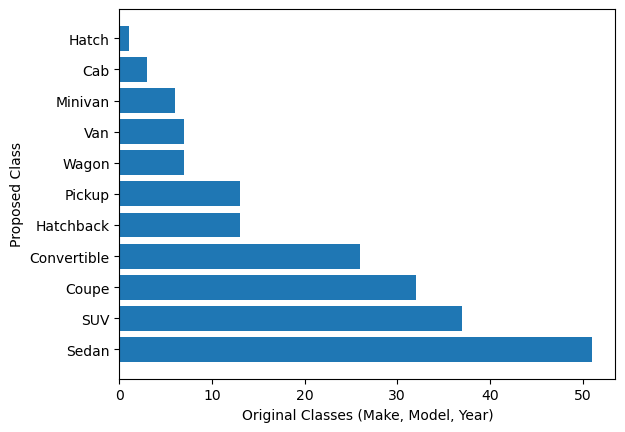

In [51]:
# Proposed classes and counts in original data
# Rename columns
proposed_classes = names_and_proposed_classes['Class'].value_counts().reset_index().rename(columns={'Class': 'Proposed Class', 'count': 'Original Classes (Make, Model, Year)'})
print(proposed_classes)

# Bar chart of counts by Class
# Horizontal bar chart
plt.barh(proposed_classes['Proposed Class'], proposed_classes['Original Classes (Make, Model, Year)'])
plt.xlabel('Original Classes (Make, Model, Year)')
plt.ylabel('Proposed Class')
plt.savefig('../Output/Original_Classes_by_Proposed_Class.png', bbox_inches='tight')